In [1]:
from ephesus.data import get_data_json, get_data_targets_json, get_data_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = get_data_csv()
data.drop(columns=["TreatmentDetected_1","AldRelated_1"], inplace=True)
data.head()

,translation,NGAP_1,Cotation_1,Hour_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,PSG,NaN,10:00:00,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,PSTA,NaN,18:00:00,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,PV19,NaN,11:00:00,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,PLVA,NaN,09:00:00,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",PLM,NaN,16:00:00,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN


In [3]:
data.shape

(4029, 12)

In [4]:
treatments = data[["translation","NGAP_1"]]
treatments = treatments.groupby("NGAP_1").count().sort_values(by="translation", ascending = False)
treatments["percentage"] = treatments["translation"]/len(data)
treatments["cum_per"] = treatments["percentage"].cumsum()
treatments.head()

,translation,percentage,cum_per
NGAP_1,,,
PSG,1450,0.359891,0.359891
PV19,514,0.127575,0.487466
TAID19,289,0.071730,0.559196
PSTA,230,0.057086,0.616282
PC19,222,0.055101,0.671382


In [5]:
treatments.percentage.sum()

0.9853561677835694

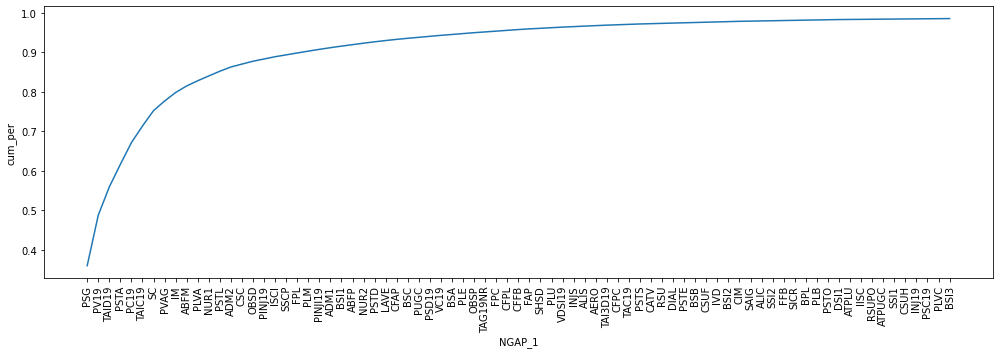

In [6]:
fig = plt.figure(figsize=(17,5))
sns.lineplot(x=treatments.index, y=treatments.cum_per)
plt.xticks(rotation=90);

In [7]:
treatments.head(15)

,translation,percentage,cum_per
NGAP_1,,,
PSG,1450,0.359891,0.359891
PV19,514,0.127575,0.487466
TAID19,289,0.071730,0.559196
PSTA,230,0.057086,0.616282
PC19,222,0.055101,0.671382
TAIC19,169,0.041946,0.713328
SC,157,0.038967,0.752296
PVAG,98,0.024324,0.776620
IM,87,0.021593,0.798213


In [8]:
treatment_list = list(treatments.head(15).index)

In [9]:
treatment_list

['PSG',
 'PV19',
 'TAID19',
 'PSTA',
 'PC19',
 'TAIC19',
 'SC',
 'PVAG',
 'IM',
 'ABFM',
 'PLVA',
 'NUR1',
 'PSTL',
 'ADM2',
 'CSC']

In [10]:
sample = data.copy()[["NGAP_1","translation"]]
sample = sample[sample["NGAP_1"].isin(treatment_list)]

In [11]:
sample

,NGAP_1,translation
fichier,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,PSG,Prise de sang faite le 19 février à domicile p...
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,PSTA,Pansement également refait le 23 mars par mylène.
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,PV19,Pcr plus prise de sang fait à domicile à 11.
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,PLVA,Prise de sang et analyse stérile des urines à ...
978eb126-14a0-46cf-bd27-44b6b77cecb7_3c344cb4-3419-4bbb-9da7-1d33d12bcc52,PSG,Prise de sang à domicile le 7 octobre.
...,...,...
a5050600-95ef-43d8-a5fa-a57c791bf843_7ee4ad79-a454-4e0b-a0e2-ef4d7661f744,TAID19,Test antigénique réalisé ce matin à domicile.
a5050600-95ef-43d8-a5fa-a57c791bf843_448853a4-f75e-403a-8fcb-8dfc18f0b4ec,TAID19,Test antigénique réalisé cet après-midi à domi...
2d035c4b-cdfa-4982-87dc-916fe07a0824_4fb0c6a1-0562-496a-ae88-1adadec059a6,PSG,Réalisation d'une prise de sang chez monsieur ...


In [12]:
sample.NGAP_1.value_counts()

PSG       1450
PV19       514
TAID19     289
PSTA       230
PC19       222
TAIC19     169
SC         157
PVAG        98
IM          87
ABFM        67
PLVA        53
NUR1        49
PSTL        48
ADM2        43
CSC         30
Name: NGAP_1, dtype: int64

In [13]:
df = pd.DataFrame()
for ngap in treatment_list:
    df = pd.concat([df, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])
df

,NGAP_1,translation
fichier,,
9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_06bf785b-ade1-473e-9f65-e561ff21f378,PSG,Prise de sang au cabinet le 12 janvier à 7h15.
9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-1b1c-4932-89c0-d6c7319f4f0d,PSG,"Monsieur mathieu, jean-yves, prise de sang à a..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_1fd32130-5ba9-448e-ab09-e69263fba5d5,PSG,"Prise de sang d'hier 27 juin au domicile, on p..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-37cc-4d0c-aa2f-5c8eddb9c4f7,PSG,Prise de sang réalisée ce matin au domicile du...
3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-e8a3-433e-9d7a-ee449ee69d5f,PSG,Prise de sang programmée pour le mardi 31 mars...
...,...,...
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-514c-4918-a92e-175f755c271e,CSC,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-b428-49e3-a253-cc78c0233172,CSC,Alors ordonnance en date du 15 mars 2022 par l...
2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-202c-4355-8cca-84a218c60606,CSC,"Donc, pour madame Didier Denise à injection so..."


In [14]:
export = pd.DataFrame(df["translation"])
export.columns = ["text"]

In [15]:
#export.to_csv("../raw_data/sample_sentencesV1.csv", index=False)

# NOUVEL EXPORT SANS DOUBLONS

In [16]:
data = get_data_csv()
data.drop_duplicates(inplace = True)
data.shape

(3925, 14)

In [17]:
# On vérifier que l'export V1 est bien égal à df_v1 
export_v1 = pd.read_csv("../raw_data/sample_sentencesV1.csv")
export_v1.shape
df_v1 = pd.DataFrame()
for ngap in treatment_list:
    df_v1 = pd.concat([df_v1, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])

test = pd.DataFrame(df_v1.reset_index()['translation'])
test.columns = ['text']
pd.concat([test,export_v1]).drop_duplicates(keep=False)

,text
0,Prise de sang au cabinet le 12 janvier à 7h15.
2,"Prise de sang d'hier 27 juin au domicile, on p..."
6,Prise de sang réalisée ce matin.
8,Prise de sang réalisée le 28 septembre à 8h.
9,Prise de sang faite au domicile le 18 octobre....
...,...
113,"Lambling, xavier's test antigénique ce jour le..."
114,Test antigénique réalisé cet après-midi à domi...
115,Réalisation d'un test antigénique covid-19 che...
116,Test antigénique réalisé hier après midi à dom...


In [18]:
#réinstanciation de sample 
sample = data.copy()
sample = sample[sample["NGAP_1"].isin(treatment_list)]
sample.shape

(3418, 14)

In [44]:
df_v1 = pd.DataFrame()
for ngap in treatment_list:
    df_v1 = pd.concat([df_v1, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])
df_v1

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_0016fa4f-0833-4d0b-a473-0c4bcee84c6d,"monsieur Didier Nicolas, prise de sang faite l...",NaN,PSG,NaN,08:00:00,True,2022-03-15T08:00:00,1,Days,True,Cabinet,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-1b1c-4932-89c0-d6c7319f4f0d,"Monsieur mathieu, jean-yves, prise de sang à a...",NaN,PSG,NaN,08:30:00,True,2021-11-03T08:30:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_117ae9b7-1e7c-46b7-abb3-0fe9ea87ec32,Prise de sang réalisée à domicile le 10 mai. À...,NaN,PSG,NaN,08:00:00,True,2021-05-10T08:00:00,8,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 16, 'KilometersNumbe..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-37cc-4d0c-aa2f-5c8eddb9c4f7,Prise de sang réalisée ce matin au domicile du...,NaN,PSG,NaN,08:27:00,True,2022-03-26T08:27:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 8, 'KilometersNumber..."
3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-e8a3-433e-9d7a-ee449ee69d5f,Prise de sang programmée pour le mardi 31 mars...,NaN,PSG,NaN,11:00:00,True,2020-04-03T11:00:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 10, 'KilometersNumbe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-514c-4918-a92e-175f755c271e,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u...",NaN,CSC,NaN,20:00:00,False,2020-12-01T08:00:00,3,Months,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 4, 'KilometersNumber..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-b428-49e3-a253-cc78c0233172,Alors ordonnance en date du 15 mars 2022 par l...,NaN,CSC,NaN,11:00:00,True,2022-03-16T11:00:00,21,Days,True,Domicile,NaN,NaN,NaN
2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-202c-4355-8cca-84a218c60606,"Donc, pour madame Didier Denise à injection so...",NaN,CSC,NaN,17:45:00,True,2021-12-17T17:45:00,1,Days,True,Domicile,NaN,NaN,NaN


In [20]:
df_data_et_df_v1 = pd.concat([df_v1.drop_duplicates(), data]) #Ok sur 4221 = 3925(data) + 296(df_v1)
df_data_et_df_v1.shape

(4225, 14)

In [21]:
df_data_et_df_v1.drop_duplicates().shape

(3925, 14)

In [22]:
df_diff = df_data_et_df_v1.drop_duplicates(keep=False)
df_diff.shape

(3625, 14)

In [23]:
sample_v2 = df_diff.copy()
sample_v2 = sample_v2[sample_v2["NGAP_1"].isin(treatment_list)]
sample_v2.shape

(3118, 14)

In [24]:
df_v2 = pd.DataFrame()
for ngap in treatment_list:
    df_v2 = pd.concat([df_v2, sample_v2[sample_v2["NGAP_1"] == ngap].sample(10, random_state=0)])
df_v2.shape

(150, 14)

In [25]:
#On vérifier que df_V1 et df_V2 sont bien différents
pd.concat([df_v1, df_v2]).drop_duplicates().shape

(450, 14)

In [26]:
export_v2 = df_v2[["translation"]]
export_v2.columns = ["text"]
export_v2

,text
fichier,
9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_776d7835-0f96-4b6f-89b6-c9934d9556b6,Bilan sanguin au cabinet par isabelle.
a5050600-95ef-43d8-a5fa-a57c791bf843_5c19c240-0883-4d4e-8cc2-65b53d18030a,"Bilan sanguin le 22 février matin, à domicile,..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b96ef5cf-112f-45fa-82ff-7e37f0cfcc63,"Prise de sang à domicile, est-ce jour le 11 mars."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_271f268a-4058-4d79-9db2-4928bc5f35a8,Prise de sang réalisée ce matin.
55d674cc-3389-4cf6-ab7c-1f1b9fa1b6ed_8a6fd178-5a31-c0ac-6c70-c15c27132294,"Prise de sang réalisé ce jour, le 19 10 2021 à..."
...,...
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_9bb9b682-a32a-4c7b-bfea-42bdca522ec3,"Injection d'EPO d'ARANESP ce jour, le 16 mars ..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_32868df4-0723-4c0b-bc18-12d9140a8859,Ce cutanée débutait le 9 février.
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_6e0f809f-7f58-4710-bf6b-06ec868ab155,Sous-cutanée faite le 28 février en même temps...


In [27]:
export_v1 = pd.read_csv("../raw_data/sample_sentencesV1.csv")
export_v1.shape
test = pd.concat([export_v2, export_v1]).reset_index()
test = pd.DataFrame(test['text'])
test.drop_duplicates().shape


(441, 1)

In [28]:
#export_v2.to_csv("../raw_data/sample_sentencesV3.csv", index=False)

# Export text + span + target

In [45]:
df_v1.shape

(300, 14)

In [46]:
test = pd.DataFrame(df_v1["translation"]).reset_index(drop=True)
test.columns = ["text"]

In [47]:
test.shape

(300, 1)

In [48]:
export_v1.shape

(300, 1)

In [137]:
df_test = df_v1.copy().reset_index()
df_test = df_test[["fichier","translation","NGAP_1"]]
df_test

,fichier,translation,NGAP_1
0,9f980dcf-b431-4e67-876f-2b8e288b7900_0016fa4f-...,"monsieur Didier Nicolas, prise de sang faite l...",PSG
1,9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-...,"Monsieur mathieu, jean-yves, prise de sang à a...",PSG
2,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_117ae9b7-...,Prise de sang réalisée à domicile le 10 mai. À...,PSG
3,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-...,Prise de sang réalisée ce matin au domicile du...,PSG
4,3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-...,Prise de sang programmée pour le mardi 31 mars...,PSG
...,...,...,...
295,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-...,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u...",CSC
296,b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-...,Alors ordonnance en date du 15 mars 2022 par l...,CSC
297,2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-...,"Donc, pour madame Didier Denise à injection so...",CSC
298,978eb126-14a0-46cf-bd27-44b6b77cecb7_3aac682d-...,Début d'une série de 8 jours. De traitements à...,CSC


In [138]:
df_test.isna().sum()

fichier        0
translation    0
NGAP_1         0
dtype: int64

In [54]:
from ephesus.sentence import *

In [72]:
data_json = extract_json("PROJECT_EPHESUS-labeling_V01.json")
data_json = tune_data(data_json)

In [73]:
data_json

{'classes': ['Treatment',
  'Cotation',
  'Date',
  'Time',
  'Frequency',
  'Duration',
  'Location'],
 'annotations': [{'text': 'Donc vaccin antigrippale, domicile non facturés.',
   'entities': [(5, 24, 'Treatment'), (26, 34, 'Location')]},
  {'text': 'Vaccin au cabinet le 15 février en même temps que le retrait des points à 11h par amandine.',
   'entities': [(0, 6, 'Treatment'),
    (10, 17, 'Location'),
    (21, 31, 'Date'),
    (53, 71, 'Treatment'),
    (74, 77, 'Time')]},
  {'text': 'Injection im réalisé ce matin à domicile.',
   'entities': [(0, 12, 'Treatment'), (20, 29, 'Date'), (32, 40, 'Location')]},
  {'text': 'Pansement, escarte, talons émis 4. 3 fois par semaine.',
   'entities': [(0, 9, 'Treatment'),
    (11, 18, 'Treatment'),
    (20, 26, 'Treatment'),
    (35, 53, 'Frequency')]},
  {'text': 'Vous avez eu tous les documents hier, merci.', 'entities': []},
  {'text': "Pour ce monsieur, c'est un ais plus, une administration de traitement. Le soir du 12 mai.",
   'entit

In [76]:
elm = data_json["annotations"][0]
elm['text']

'Donc vaccin antigrippale, domicile non facturés.'

In [79]:
sentences = []
for tuple_cat in elm["entities"]:
    if tuple_cat[2] == 'Treatment':
                word = elm["text"][tuple_cat[0]:tuple_cat[1]]
                sentences.append(word)

In [81]:
sentences = []
spans = []
for elm in data_json["annotations"]:
    if len(elm["entities"]) == 0:
        pass
    else:
        for tuple_cat in elm["entities"]:
            if tuple_cat[2] == 'Treatment':
                word = elm["text"][tuple_cat[0]:tuple_cat[1]]
                sentences.append(elm['text'])
                spans.append(word)       

In [83]:
test = pd.DataFrame({"translation":sentences, "spans":spans})
test

,translation,spans
0,"Donc vaccin antigrippale, domicile non facturés.",vaccin antigrippale
1,Vaccin au cabinet le 15 février en même temps ...,Vaccin
2,Vaccin au cabinet le 15 février en même temps ...,retrait des points
3,Injection im réalisé ce matin à domicile.,Injection im
4,"Pansement, escarte, talons émis 4. 3 fois par ...",Pansement
...,...,...
333,PCR cabinet par isabelle.,PCR
334,"Test pcr pour germain gouaze, fais le vendredi...",Test pcr
335,Test PCR covid réalisé cet après midi au cabinet.,Test PCR
336,Pc19 le 23 décembre à 8h50 par amandine.,Pc19


In [151]:
test_v2 = test.drop_duplicates(subset=['translation'])

In [152]:
test_v2.isna().sum()

translation    0
spans          0
dtype: int64

In [172]:
export_with_targets = df_test.merge(test_v2, how='left', on="translation")
export_with_targets.dropna(inplace=True)
export_with_targets.to_csv("../raw_data/export_with_targets.csv")

In [173]:
export_with_targets.shape

(191, 4)

In [174]:
export_with_targets.drop_duplicates()

,fichier,translation,NGAP_1,spans
1,9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-...,"Monsieur mathieu, jean-yves, prise de sang à a...",PSG,prise de sang
3,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-...,Prise de sang réalisée ce matin au domicile du...,PSG,Prise de sang
4,3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-...,Prise de sang programmée pour le mardi 31 mars...,PSG,Prise de sang
5,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_78cda6a9-...,"Bilan sanguin, domicile non facturés par isabe...",PSG,Bilan sanguin
7,2d035c4b-cdfa-4982-87dc-916fe07a0824_52b269ed-...,Réalisation d'une prise de sang chez monsieur ...,PSG,prise de sang
...,...,...,...,...
295,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-...,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u...",CSC,Sous-cutanée
296,b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-...,Alors ordonnance en date du 15 mars 2022 par l...,CSC,sous-cut
297,2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-...,"Donc, pour madame Didier Denise à injection so...",CSC,injection sous-cutanée
298,978eb126-14a0-46cf-bd27-44b6b77cecb7_3aac682d-...,Début d'une série de 8 jours. De traitements à...,CSC,sous-cutanée


In [175]:
export_with_targets.isna().sum()

fichier        0
translation    0
NGAP_1         0
spans          0
dtype: int64

In [177]:
export_with_targets["NGAP_1"].nunique()

14

In [176]:
for i in range(101):
    print(export_with_targets.iloc[i,1])
    print("")
    print(export_with_targets.iloc[i,2])
    print("")
    print(export_with_targets.iloc[i,3])
    print("")

Monsieur mathieu, jean-yves, prise de sang à ajouter à la prescription, des circuits tannés.

PSG

prise de sang 

Prise de sang réalisée ce matin au domicile du patient.

PSG

Prise de sang

Prise de sang programmée pour le mardi 31 mars. À l'heure de notre passage habituel du matin, merci.

PSG

Prise de sang

Bilan sanguin, domicile non facturés par isabelle.

PSG

Bilan sanguin

Réalisation d'une prise de sang chez monsieur denis pierre. Prise de sang réalisée le 11 mars 2022 à 7h30 à domicile en même temps que les pansement, merci.

PSG

prise de sang 

Prise de sang réaliséee le 4 mars à midi et demi.

PSG

Prise de sang

Pour Sylvie Caillol, prise de sang à domicile. Sécu mutuelles, tournee un. Monsieur morillon.

PSG

prise de sang

Bilan sanguin le 11 février matin, à domicile.

PSG

Bilan sanguin

Prise de sang réalisée ce matin au domicile de la patiente.

PSG

Prise de sang

Test antigénique réalisé cet après-midi à domicile.

TAID19

Test antigénique

Test antigénique réal

In [130]:
kjsfjlsdfjl = get_data_csv()

In [131]:
kjsfjlsdfjl.isna().sum()

translation                  0
TreatmentDetected_1       4029
NGAP_1                      59
Cotation_1                3989
Hour_1                       0
AldRelated_1                 0
CareBeginDate_1              0
CareDuration_1               0
CareDurationTypeEnum_1       0
CareOnPublicHoliday_1        0
CareLocation_1               0
CareBeginHpName_1         2641
ZoneName_1                3903
IK_1                      2916
dtype: int64

In [179]:
pd.read_csv("../raw_data/input_data_final.csv")

,fichier,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
0,9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-...,Prise de sang faite le 19 février à domicile p...,NaN,PSG,NaN,10:00:00,True,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
1,2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-...,Pansement également refait le 23 mars par mylène.,NaN,PSTA,NaN,18:00:00,True,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN
2,b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-...,Pcr plus prise de sang fait à domicile à 11.,NaN,PV19,NaN,11:00:00,False,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN
3,3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-...,Prise de sang et analyse stérile des urines à ...,NaN,PLVA,NaN,09:00:00,True,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN
4,2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-...,"Bonjour, merci de renouveler cette ordonnance ...",NaN,PLM,NaN,16:00:00,False,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,a5050600-95ef-43d8-a5fa-a57c791bf843_448853a4-...,Test antigénique réalisé cet après-midi à domi...,NaN,TAID19,NaN,14:00:00,False,2022-04-05T14:00:00,1,Days,True,Domicile,NaN,NaN,NaN
4025,2d035c4b-cdfa-4982-87dc-916fe07a0824_4fb0c6a1-...,Réalisation d'une prise de sang chez monsieur ...,NaN,PSG,NaN,08:15:00,False,2022-02-24T08:15:00,1,Days,True,Domicile,NaN,NaN,NaN
4026,b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b8a5877a-...,Ordonnance pour la préparation du pilulier en ...,NaN,SSCP,NaN,17:00:00,True,2022-02-03T17:00:00,12,Months,True,Domicile,NaN,NaN,NaN
4027,978eb126-14a0-46cf-bd27-44b6b77cecb7_01fc29bf-...,Début des soins le 10 juin. Avec début des sou...,NaN,SC,NaN,08:00:00,True,2021-06-10T08:00:00,21,Days,True,Domicile,NaN,NaN,NaN
